<a href="https://colab.research.google.com/github/zoed98/Python-Machine-Learning/blob/main/16_1Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

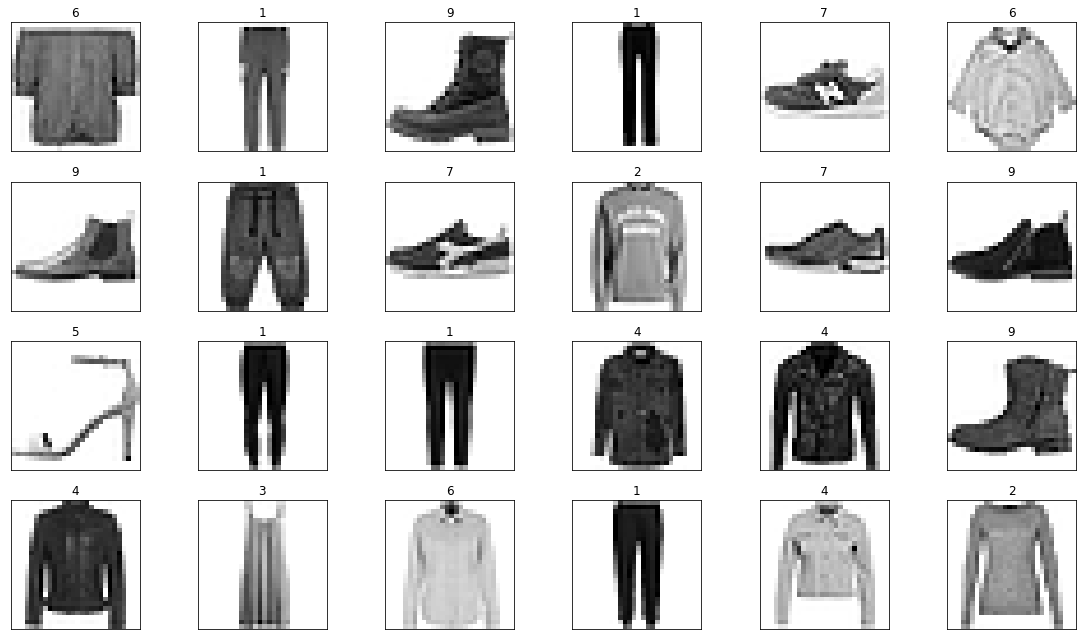

In [8]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  
    axes.set_yticks([])  
    axes.set_title(target)

plt.tight_layout()

In [9]:
X_train = X_train.reshape((60000, 28, 28, 1))

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [12]:
X_test.shape

(10000, 28, 28, 1)

In [13]:
X_train = X_train.astype('float32') / 255

In [14]:
X_test = X_test.astype('float32') / 255

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train)

In [17]:
y_train.shape

(60000, 10)

In [18]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [19]:
y_test = to_categorical(y_test)

In [20]:
y_test.shape

(10000, 10)

In [21]:
from tensorflow.keras.models import Sequential 

In [22]:
cnn = Sequential() 

In [23]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [24]:
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', 
               input_shape=(28, 28, 1)))

In [25]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [27]:
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [28]:
cnn.add(Flatten())

In [29]:
cnn.add(Dense(units=128, activation='relu'))

In [30]:
cnn.add(Dense(units=10, activation='softmax'))

In [31]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

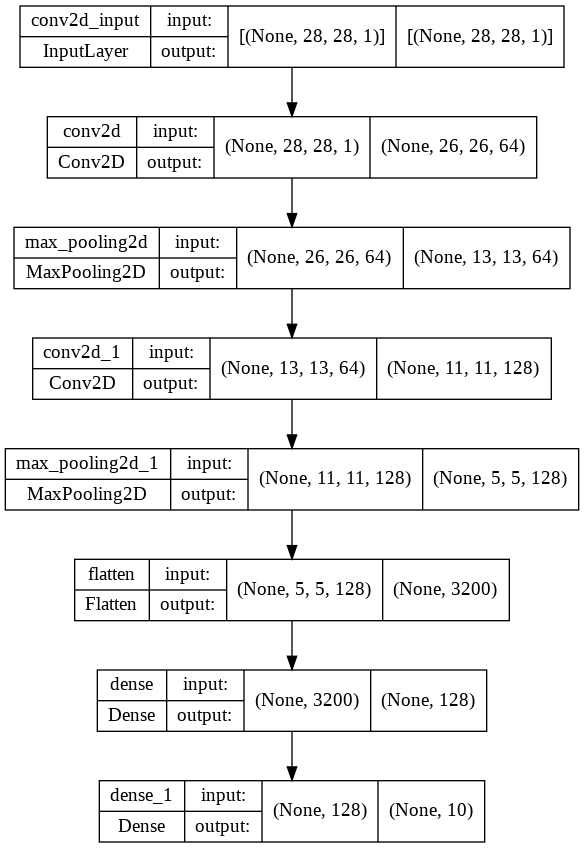

In [32]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')

In [33]:
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 108s 127ms/step - loss: 0.4629 - accuracy: 0.8349 - val_loss: 0.3390 - val_accuracy: 0.8805
Epoch 2/5
844/844 [==============================] - 106s 125ms/step - loss: 0.3019 - accuracy: 0.8913 - val_loss: 0.3022 - val_accuracy: 0.8910
Epoch 3/5
844/844 [==============================] - 106s 126ms/step - loss: 0.2549 - accuracy: 0.9072 - val_loss: 0.2566 - val_accuracy: 0.9075
Epoch 4/5
844/844 [==============================] - 106s 126ms/step - loss: 0.2222 - accuracy: 0.9175 - val_loss: 0.2416 - val_accuracy: 0.9162
Epoch 5/5
844/844 [==============================] - 106s 126ms/step - loss: 0.1936 - accuracy: 0.9284 - val_loss: 0.2419 - val_accuracy: 0.9118


In [36]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 7s 21ms/step - loss: 0.2603 - accuracy: 0.9086


In [37]:
loss

0.26030874252319336

In [38]:
accuracy

0.9085999727249146

In [39]:
predictions = cnn.predict(X_test)

In [40]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [41]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000004492%
1: 0.0000001809%
2: 0.0000003580%
3: 0.0000003535%
4: 0.0000000079%
5: 0.0015737513%
6: 0.0000031900%
7: 0.0087014763%
8: 0.0000078389%
9: 99.9897122383%


In [42]:
images = X_test.reshape((10000, 28, 28))

In [43]:
incorrect_predictions = []

In [44]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [45]:
len(incorrect_predictions)

914

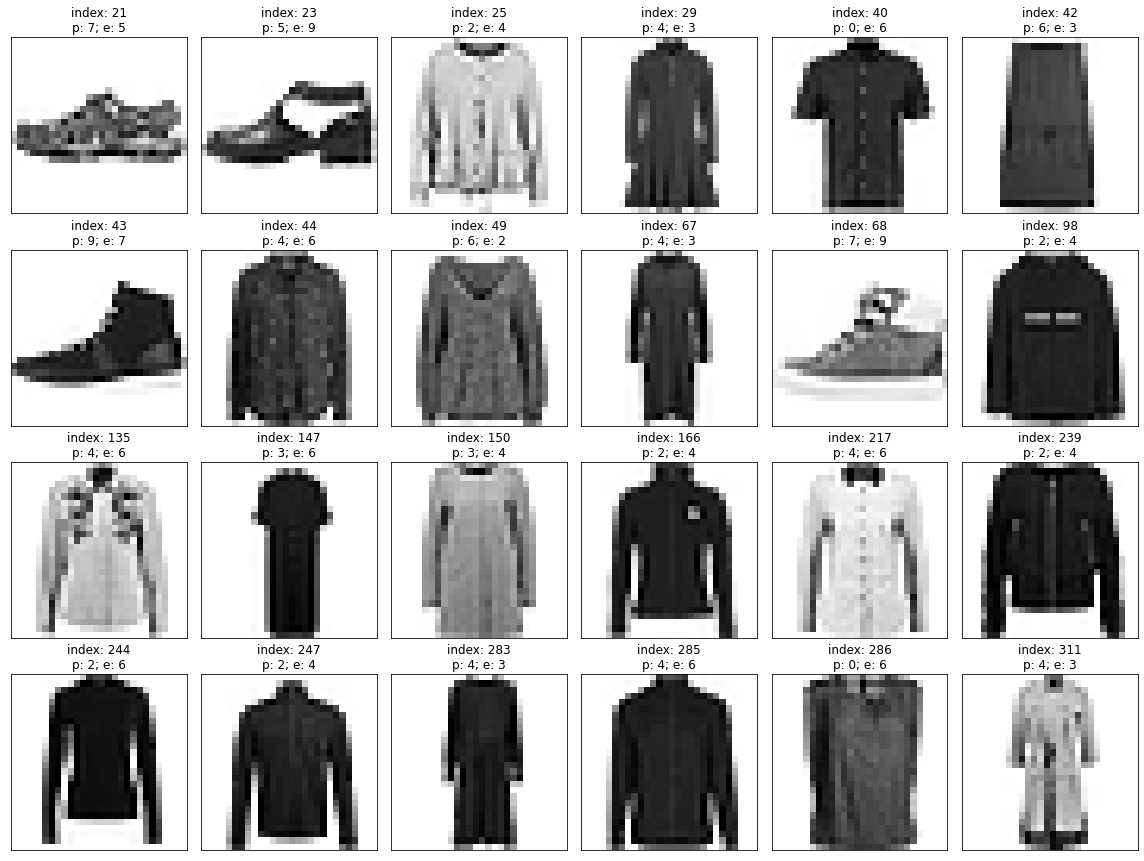

In [46]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([]) 
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

In [47]:
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')

In [48]:
display_probabilities(predictions[340])

0: 0.0384373270%
1: 0.0020969113%
2: 3.2486844808%
3: 0.0040161391%
4: 93.6015665531%
5: 0.0002724250%
6: 0.1867781742%
7: 0.0002614866%
8: 2.9155958444%
9: 0.0022950346%


In [49]:
display_probabilities(predictions[740])

0: 0.0026558535%
1: 0.0001755474%
2: 0.0034861063%
3: 99.9232649803%
4: 0.0164057928%
5: 0.0003639260%
6: 0.0433929497%
7: 0.0002126468%
8: 0.0092880597%
9: 0.0007538629%


In [50]:
display_probabilities(predictions[1260])

0: 99.5122492313%
1: 0.0000025893%
2: 0.0016558821%
3: 0.0016220745%
4: 0.0000137090%
5: 0.0000013871%
6: 0.4844170064%
7: 0.0000000062%
8: 0.0000389358%
9: 0.0000000745%


In [51]:
cnn.save('mnist_cnn.h5')

In [52]:
from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.h5')